# Setup and Obtaining Statistics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from scipy import stats
import nba_api.stats.endpoints as nba

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'

In [8]:
df = nba.leaguedashplayerstats.LeagueDashPlayerStats(season_type_all_star='Playoffs').get_data_frames()
df = pd.DataFrame(df[0])
print(df.shape)
print(df.head)

"""
Dataframe explanation:

NBA's API returns a list of IDs, names, and statistics related to NBA basketball. In this particular notebook,
we take a look at the correlation between an opponent's FGM, or field goals made, and FG_PCT, or field goal
percentage.

Field goals made - the amount of shots a team makes in a game
Field goal percentage - the amount of field goals made, divided by field goals attempted

Thorough this notebook, some code lines may be commented out. That is because that particular line
is very useful when analyzing a different endpoint of NBA's API response, but it might not be
necessary for analyzing the currently displayed dataframe
"""

(230, 65)
<bound method NDFrame.head of      PLAYER_ID          PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   AGE  GP  \
0       203932         Aaron Gordon  1610612743               DEN  25.0   6   
1      1630174        Aaron Nesmith  1610612738               BOS  21.0   5   
2       202692           Alec Burks  1610612752               NYK  29.0   5   
3      1627936          Alex Caruso  1610612747               LAL  27.0   6   
4       203458             Alex Len  1610612764               WAS  27.0   5   
..         ...                  ...         ...               ...   ...  ..   
225     202083      Wesley Matthews  1610612747               LAL  34.0   6   
226    1626161  Willie Cauley-Stein  1610612742               DAL  27.0   6   
227    1630214       Xavier Tillman  1610612763               MEM  22.0   3   
228    1627812         Yogi Ferrell  1610612746               LAC  28.0   3   
229    1630192           Zeke Nnaji  1610612743               DEN  20.0   2   

     W  L  

"\nDataframe explanation:\n\nNBA's API returns a list of IDs, names, and statistics related to NBA basketball. In this particular notebook,\nwe take a look at the correlation between an opponent's FGM, or field goals made, and FG_PCT, or field goal\npercentage.\n\nField goals made - the amount of shots a team makes in a game\nField goal percentage - the amount of field goals made, divided by field goals attempted\n\nThorough this notebook, some code lines may be commented out. That is because that particular line\nis very useful when analyzing a different endpoint of NBA's API response, but it might not be\nnecessary for analyzing the currently displayed dataframe\n"

# Filtering statistics & TS%

In [20]:
data = pd.DataFrame(df[['PLAYER_NAME', 'PTS', 'FGA', 'FTA']])
data = data[data['PTS'] > 32]

print(data.columns)

#TS%
ts = []
for i in range(data.shape[0]):
    player = data.iloc[i]
    tsper = player['PTS'] / (2 * (player['FGA'] + 0.44 * player['FTA']))
    ts.append(tsper)

data['TS'] = ts
#print(data.sort_values("FG3_PCT", 0))

Index(['PLAYER_NAME', 'PTS', 'FGA', 'FTA'], dtype='object')


# Outlier Detection

In [21]:
outliers = data[np.abs(stats.zscore(data[['PTS', 'TS']])) > 2]
outliers.shape

(14, 5)

# Regression

# Graphing

<ipython-input-39-f3bee64d6695>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers.sort_values("TS", 0, inplace=True)


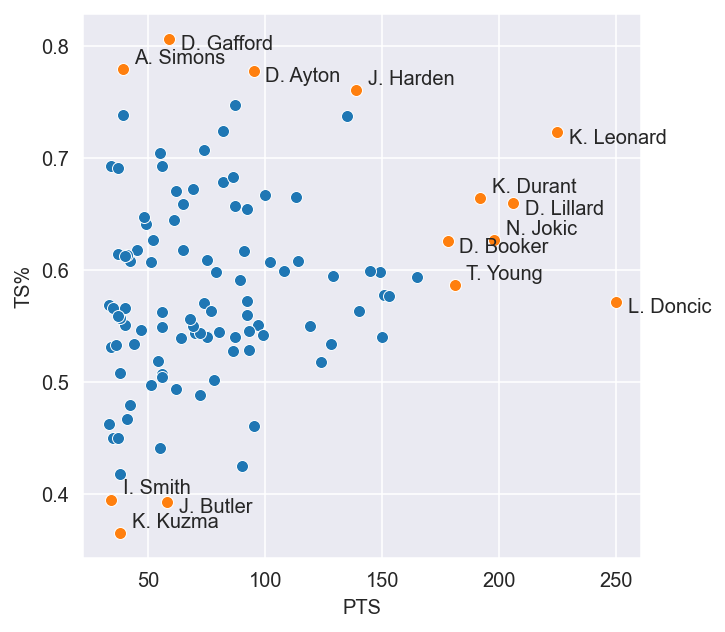

In [39]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(5, 5))
ax.set(xlabel='PTS', ylabel='TS%')
abacate = (0.5, -1)
sns.scatterplot(ax=ax, data=data, x='PTS', y='TS')
sns.scatterplot(ax=ax, data=outliers, x='PTS', y='TS')

# decision hyperplane plotting

# name plotting
for i in range(outliers.shape[0]):
    outliers.sort_values("TS", 0, inplace=True)
    x_pos = outliers["PTS"].iloc[i] + 5
    y_pos = outliers["TS"].iloc[i] + abacate[i % 2] * 0.01
    names = outliers['PLAYER_NAME'].iloc[i].split(" ")
    names[0] = names[0][0] + '.'
    last_names = ' '.join(names)
    ax.annotate(text=last_names, xy=(x_pos, y_pos), xycoords='data')

plt.savefig("output/player_playoff_scoring", dpi=300)